In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r'C:\Users\Aria\OneDrive\Desktop\Excels\online_sales_dataset.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [3]:
df.shape

(49782, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [5]:
df.dtypes

InvoiceNo              int64
StockCode             object
Description           object
Quantity               int64
InvoiceDate           object
UnitPrice            float64
CustomerID           float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
SalesChannel          object
ReturnStatus          object
ShipmentProvider      object
WarehouseLocation     object
OrderPriority         object
dtype: object

In [6]:
df["InvoiceNo"] = df["InvoiceNo"].astype(str)

In [7]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

In [8]:
df[df['CustomerID'].isnull()].shape[0]

4978

In [9]:
df["CustomerID"] = df["CustomerID"].astype(str)

In [10]:
pd.DataFrame(df.dtypes).value_counts()


0             
object            12
float64            3
datetime64[ns]     1
int64              1
Name: count, dtype: int64

In [11]:
#handlingMissingData

In [12]:
df['CustomerID'][df['CustomerID'] == 'nan'] #مقادیر نال قبل از تبدیل دیتارو تبدیل به رشته کرده

4        nan
49       nan
62       nan
71       nan
103      nan
        ... 
49739    nan
49749    nan
49760    nan
49761    nan
49770    nan
Name: CustomerID, Length: 4978, dtype: object

In [13]:
df['CustomerID'] = df['CustomerID'].replace('nan', np.nan)

In [14]:
df['CustomerID'].isna().sum()

np.int64(4978)

In [15]:
total_missing = df.isnull().sum().sum()
percent_missing = total_missing / df.size * 100
print(f"Missing : {total_missing} ({percent_missing:.2f}%)")


Missing : 10952 (1.29%)


In [16]:
missing_per_column = df.isnull().sum() / len(df) * 100
missing_per_column.sort_values(ascending=False)

CustomerID           9.999598
WarehouseLocation    7.000522
ShippingCost         4.999799
InvoiceNo            0.000000
StockCode            0.000000
InvoiceDate          0.000000
UnitPrice            0.000000
Quantity             0.000000
Description          0.000000
Discount             0.000000
Country              0.000000
Category             0.000000
PaymentMethod        0.000000
SalesChannel         0.000000
ReturnStatus         0.000000
ShipmentProvider     0.000000
OrderPriority        0.000000
dtype: float64

In [17]:
import numpy as np

# reproducibility
np.random.seed(42)

# 1. مقادیر معتبر و توزیع آنها
valid_vals = df['WarehouseLocation'].dropna()
probs = valid_vals.value_counts(normalize=True)   # index = locations, values = probabilities
choices = probs.index.to_list()
p = probs.values

# 2. نشانه‌گذاری ردیف‌هایی که قرار است پر شوند (برای ردیابی)
mask = df['WarehouseLocation'].isnull()
df['WarehouseLocation_imputed'] = False
df.loc[mask, 'WarehouseLocation_imputed'] = True

# 3. نمونه‌برداری با توزیع مشاهده‌شده برای تمام نال‌ها
n = mask.sum()
df.loc[mask, 'WarehouseLocation'] = np.random.choice(choices, size=n, p=p, replace=True)

# 4. کنترل نهایی
print("Nulls after imputation:", df['WarehouseLocation'].isnull().sum())
print("Distribution after imputation:")
print(df['WarehouseLocation'].value_counts(normalize=True).head(10))



Nulls after imputation: 0
Distribution after imputation:
WarehouseLocation
Amsterdam    0.204632
Berlin       0.199630
London       0.199008
Rome         0.198646
Paris        0.198084
Name: proportion, dtype: float64


In [18]:
df['WarehouseLocation_imputed'].sum() #ستون فلگ ماست برای اینکه بدونیم کدومارو تغیر دادیم


np.int64(3485)

In [19]:
df['WarehouseLocation'].value_counts(normalize=True)

WarehouseLocation
Amsterdam    0.204632
Berlin       0.199630
London       0.199008
Rome         0.198646
Paris        0.198084
Name: proportion, dtype: float64

In [20]:
df['CustomerID'] = df['CustomerID'].replace(np.nan , 'miss')

In [21]:
#missing patern

In [22]:
# درصد نال‌ها در هر کانال فروش
df.groupby('SalesChannel')['ShippingCost'].apply(lambda x: x.isnull().mean()*100)


SalesChannel
In-store    4.852210
Online      5.145503
Name: ShippingCost, dtype: float64

In [23]:
# درصد نال‌ها در OrderPriority
df.groupby('PaymentMethod')['ShippingCost'].apply(lambda x: x.isnull().mean()*100)

PaymentMethod
Bank Transfer    4.860572
Credit Card      4.894132
paypall          5.246895
Name: ShippingCost, dtype: float64

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,WarehouseLocation_imputed
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,False
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,False
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,False
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,False
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,miss,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,London,Medium,True


In [26]:
shippingCostImp = df['ShippingCost'].values.reshape(-1, 1)
shippingCostImp.shape

(49782, 1)

In [27]:
si = SimpleImputer(missing_values=np.nan, strategy='median')
si.fit(shippingCostImp)
shippingCostImp = si.transform(shippingCostImp)
df['ShippingCost'] = shippingCostImp #در نهایت هم بهتره یک ستون فلگ هم برای این فیچر اضافه میکردیم تا بدونیم کدوما نال داشتن


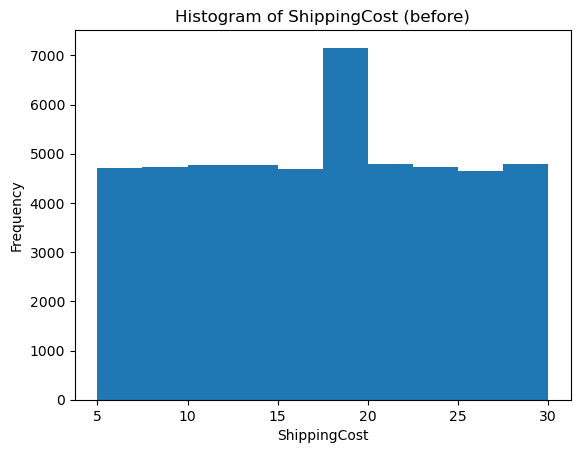

In [28]:
import matplotlib.pyplot as plt

plt.hist(df['ShippingCost'], bins=10)
plt.xlabel('ShippingCost')
plt.ylabel('Frequency')
plt.title('Histogram of ShippingCost (before)')
plt.show()

In [29]:
#روش دوم بدون استفاده از سایکیت لرن
meanshipcost = df['ShippingCost'].mean()

In [30]:
df['ShippingCost'] = df['ShippingCost'].fillna(meanshipcost)

In [31]:
df['ShippingCost'].mean()

np.float64(17.494802739946167)

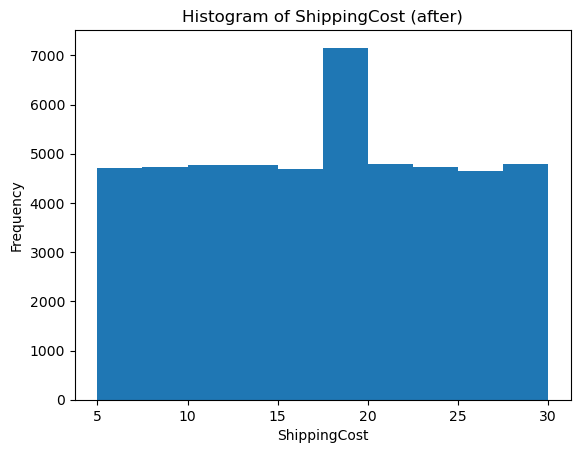

In [32]:
import matplotlib.pyplot as plt

plt.hist(df['ShippingCost'], bins=10)
plt.xlabel('ShippingCost')
plt.ylabel('Frequency')
plt.title('Histogram of ShippingCost (after)')
plt.show()

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,WarehouseLocation_imputed
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,False
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,False
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,False
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,False
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,miss,United Kingdom,1.501433,Bank Transfer,17.50,Electronics,In-store,Not Returned,FedEx,London,Medium,True


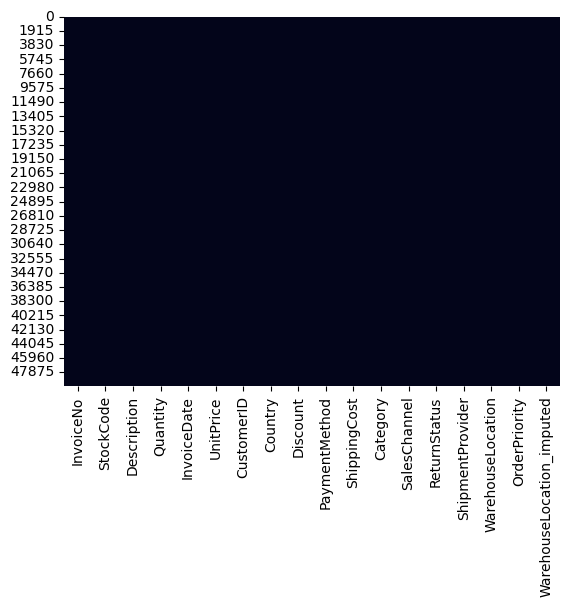

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [35]:
df.isnull().sum()

InvoiceNo                    0
StockCode                    0
Description                  0
Quantity                     0
InvoiceDate                  0
UnitPrice                    0
CustomerID                   0
Country                      0
Discount                     0
PaymentMethod                0
ShippingCost                 0
Category                     0
SalesChannel                 0
ReturnStatus                 0
ShipmentProvider             0
WarehouseLocation            0
OrderPriority                0
WarehouseLocation_imputed    0
dtype: int64

In [36]:
print(df['InvoiceNo'].count())
print(df['InvoiceNo'].isnull().sum())
len(df['InvoiceNo'].unique())

49782
0


48494

In [37]:
x = df['InvoiceNo'].duplicated()
x[x == True].count()


np.int64(1288)

In [38]:
c = df[df['InvoiceNo'].duplicated(keep=False)]
c.sort_values("InvoiceNo").head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,WarehouseLocation_imputed
31185,101316,SKU_1988,Blue Pen,-6,2023-07-23 09:00:00,-24.19,miss,Portugal,1.520913,paypall,17.50,Electronics,Online,Not Returned,UPS,Rome,Low,True
23515,101316,SKU_1216,Notebook,23,2022-09-06 19:00:00,74.76,78945.0,Netherlands,0.070000,paypall,20.31,Electronics,Online,Not Returned,UPS,London,Medium,False
42265,102948,SKU_1051,White Mug,9,2024-10-27 01:00:00,13.95,24459.0,Norway,0.370000,paypall,10.26,Furniture,In-store,Not Returned,Royal Mail,Berlin,Low,False
37369,102948,SKU_1229,Backpack,23,2024-04-06 01:00:00,36.96,10783.0,France,0.070000,Bank Transfer,21.15,Furniture,Online,Not Returned,Royal Mail,Amsterdam,Medium,False
33727,104902,SKU_1867,T-shirt,5,2023-11-06 07:00:00,98.01,70610.0,Belgium,0.150000,paypall,19.60,Furniture,Online,Not Returned,FedEx,Rome,High,False


In [39]:
x = df[['InvoiceNo' , 'Quantity' , 'Description']].duplicated(keep = False)

In [40]:
df[x].sort_values('InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,WarehouseLocation_imputed
8491,142137,SKU_1320,White Mug,8,2020-12-19 19:00:00,83.12,39972.0,Portugal,0.39,paypall,19.51,Apparel,In-store,Not Returned,FedEx,Rome,Low,False
49031,142137,SKU_1923,White Mug,8,2025-08-04 23:00:00,62.22,95787.0,Spain,0.43,Credit Card,12.64,Apparel,In-store,Not Returned,FedEx,Paris,Medium,False
10882,747049,SKU_1130,Wall Clock,43,2021-03-29 10:00:00,89.75,21583.0,Sweden,0.39,paypall,11.52,Apparel,In-store,Not Returned,FedEx,Berlin,Low,False
27113,747049,SKU_1007,Wall Clock,43,2023-02-03 17:00:00,92.30,26420.0,United Kingdom,0.28,Credit Card,9.83,Accessories,In-store,Not Returned,UPS,London,Low,False
38676,763873,SKU_1307,T-shirt,2,2024-05-30 12:00:00,3.18,44902.0,Netherlands,0.15,Credit Card,10.71,Electronics,Online,Not Returned,DHL,Paris,Low,False
39355,763873,SKU_1875,T-shirt,2,2024-06-27 19:00:00,21.22,79713.0,Germany,0.12,Credit Card,21.09,Accessories,In-store,Returned,DHL,Paris,High,False


In [44]:
#EDA

In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,WarehouseLocation_imputed
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,False
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,False
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,False
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,False
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,miss,United Kingdom,1.501433,Bank Transfer,17.50,Electronics,In-store,Not Returned,FedEx,London,Medium,True


In [67]:
mask = (df['Quantity'] < 0) & (df['ReturnStatus'] == 'Not Returned')
df.loc[mask, 'Quantity'] = df.loc[mask, 'Quantity'].abs()


In [68]:
df['Quantity'][ (df['Quantity'] < 0) & (df['ReturnStatus'] == 'Not Returned')]

Series([], Name: Quantity, dtype: int64)

In [74]:
mask = df['UnitPrice'] < 0
df.loc[mask, 'UnitPrice'] = df.loc[mask, 'UnitPrice'].abs()

In [106]:
df['UnitPrice'].mean()

np.float64(50.62503053312443)

In [ ]:
from scipy import stats 

In [104]:
df['UnitPrice']
stats.trim_mean(df['UnitPrice'], proportiontocut=0.1)

np.float64(50.66351905790187)

<Axes: >

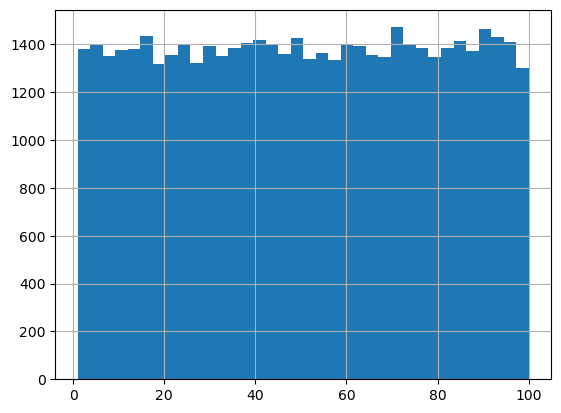

In [124]:
df['UnitPrice'].hist(bins=36)

In [114]:
df['UnitPrice'].mode()

0    47.54
Name: UnitPrice, dtype: float64

In [115]:
df['UnitPrice'].skew()

np.float64(-0.008011763854083611)

In [116]:
df['UnitPrice'].kurt()

np.float64(-1.2035822925283177)

In [123]:
import numpy as np

q75, q25 = np.percentile(df['UnitPrice'], [75 ,25])
iqr = q75 - q25
bin_width = 2 * iqr / (len(df['UnitPrice']) ** (1/3))
bins = int((df['UnitPrice'].max() - df['UnitPrice'].min()) / bin_width)
bins

36

In [132]:
df['Quantity'].mean()

np.float64(24.676830983086255)

In [133]:
stats.trim_mean(df['Quantity'], proportiontocut=0.1)

np.float64(24.781574850600112)

<Axes: >

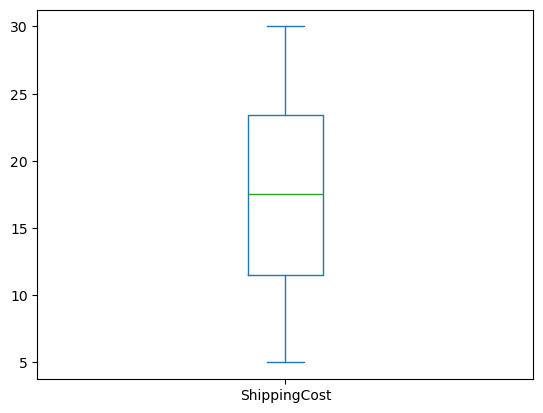

In [154]:
df['ShippingCost'].plot.box()